In [1]:
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import graphviz

In [2]:
iris = load_iris()
data = iris.data
x = iris.data[:, [2, 3]]
y = iris.target
print(x.shape,y.shape)

(150, 2) (150,)


In [3]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)
X_combined= np.vstack((xtrain, xtest))
y_combined = np.hstack((ytrain, ytest))

In [4]:
def plot_decision_regions(X, y, classifier, test_idx, test_wrong_idx, resolution=0.02):
    fig=plt.figure(figsize=(10,6))
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        c2 = ['Setosa', 'Versicolor', 'Virginical']
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=c2[cl],
                    edgecolor='black')

    # highlight test samples
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:, 0],
                X_test[:, 1],
                 c='y',
                edgecolor='black',
                 alpha=1.0,
                linewidth=1,
                 marker='o',
                s=100,
                label='test data')
    # plot wrong test
    X_test, y_test = X[test_idx, :], y[test_idx]
    X_test_wrong, y_test_wrong = X_test[test_wrong_idx], y_test[test_wrong_idx]
    
    plt.scatter(X_test_wrong[:, 0],
                X_test_wrong[:, 1],
                 c='r',
                edgecolor='black',
                 alpha=1.0,
                linewidth=1,
                 marker='o',
                s=100,
                label='test wrong data')   

0.9555555555555556


d:\Users\69243\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


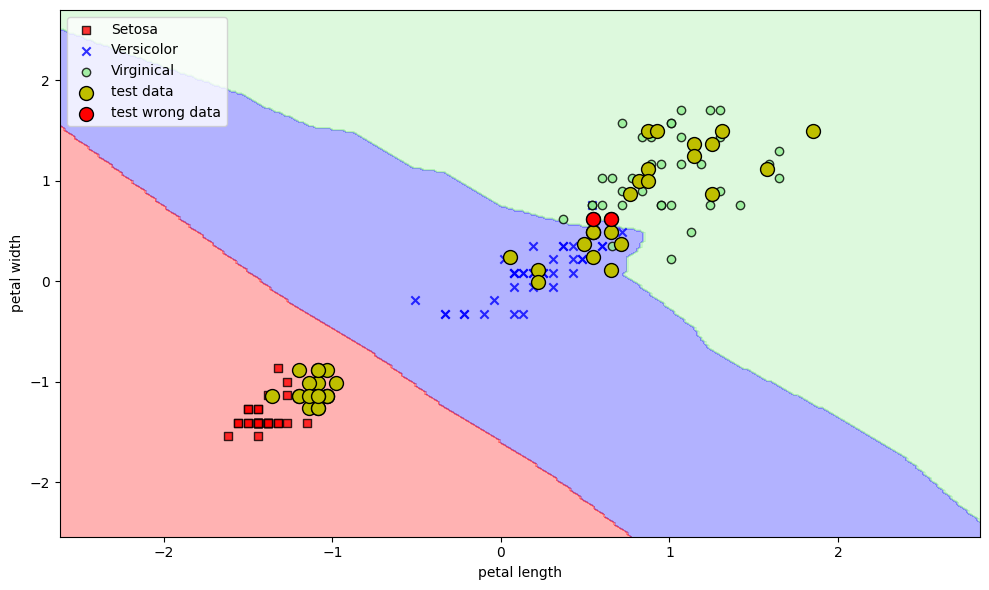

In [5]:
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2,
                           metric='minkowski')
knn.fit(xtrain, ytrain)
print(knn.score(xtest,ytest))
test_wrong_idx = (ytest!=knn.predict(xtest))
plot_decision_regions(X_combined, y_combined,
                      classifier=knn, test_idx=range(105, 150), test_wrong_idx = test_wrong_idx)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()